In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
import sys
sys.path.append('..')
from src.commons.classes import Point
from src.commons.methods import generate_random_points
from src.k_means.main import generate_k_points, assign_points, update_centers

In [4]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np

In [5]:
colors = {
    0: 'blue',
    1: 'green',
    2: 'red',
    3: 'cyan',
    4: 'magenta',
    5: 'yellow',
    6: 'black',
    7: 'orange',
    8: 'pink',
    9: 'paleturquoise'
}

In [6]:
test_data = generate_random_points(0.0, 100.0, 100)
k_points = generate_k_points(test_data, 10)
assignments = assign_points(test_data, k_points)

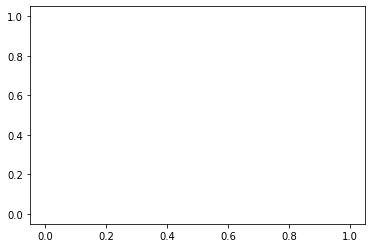

In [7]:
fig, ax = plt.subplots()
x, y = [],[]
sc = ax.scatter(x,y)

In [8]:
init_data = []
init_data.extend(test_data)
init_data.extend(k_points)

In [9]:
def init():
    x = [item.x for item in init_data]
    y = [item.y for item in init_data]
    sc.set_offsets(np.c_[np.asarray(x),np.asarray(y)])
    return sc,

In [10]:
def animate(i):
    new_centers = update_centers(test_data, assignments)
    temp_assignments = assign_points(test_data, new_centers)
    
    temp_data = []
    temp_data.extend(test_data)
    temp_data.extend(new_centers)
    
    x = [item.x for item in init_data]
    y = [item.y for item in init_data]
    sc.set_offsets(np.c_[np.asarray(x),np.asarray(y)])
    return sc,

In [11]:
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=2, interval=100, repeat=True)
anim.save("movie.gif", writer=animation.PillowWriter(fps=24))

In [13]:
plt.rcParams['animation.ffmpeg_path'] = '/usr/bin/ffmpeg'
Writer = animation.writers['ffmpeg']
writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)
anim.save("test.mp4", writer=writer)